# Assignment 7 

## Grade: /100 pts

This notebook contains the questions for Assignment 7. 

Make sure to complete this assignment individually and appropriately reference all external code and documentation used. ***In order for your submission to be valid, you must adhere to the function definitions which have been made (failure to do so will result in a grade of 0). You must upload this completed Jupyter Notebook file as your submission (other file types are not permitted and will result in a grade of 0).*** You are responsible for selecting and importing additional packages.

### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.

In [21]:
## perform the necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import recall_score, make_scorer, mean_squared_error, confusion_matrix, precision_score, roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import torch
import time

# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data set

In this Assignment you need to download and use "Dataset.csv". 

This dataset is a modified dataset from Kaggle datasets called "Lower Back Pain Symptoms Dataset". Lower back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs or tendons in the lumbar spine.
This data set is about to identify/label a person as abnormal or normal using collected physical spine details/data.



### Question 1: Load Datasets (15pts)

A) Load the "Dataset.csv" file.

B) Encode the output classes `Label` (0: Normal, 1: Abnormal) and separate inputs and outputs (features and target). (2 pts)

C) Split the data into equals-sized training and test sets. Use a random_state = 42, and ensure the `balanced distribution` of labels when splitting data.  

D) How many observations do you have in your training set?  

E) How many observations for each class in your training set?

F) Z-standarize the input features of the training and test sets.

In [19]:
data = pd.read_csv('Dataset.csv')
cols = ['Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12']
features = data[cols]
target = data.Label.replace({'Normal': 0, 'Abnormal': 1})

Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, test_size=.5, random_state=42, stratify=target)


print('Number of observations in the testing set:', len(ytest))
print('Number of observations in the training set:', len(ytrain))
print('\nNumber of each class in the ytraining set:\n',ytrain.value_counts())
print('\nNumber of each class in the Xtraining set:\n',Xtrain.value_counts())

scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

Number of observations in the testing set: 155
Number of observations in the training set: 155

Number of each class in the ytraining set:
 Label
1    105
0     50
Name: count, dtype: int64

Number of each class in the Xtraining set:
 Col1        Col2       Col3       Col4       Col5        Col6        Col7      Col8     Col9     Col10     Col11       Col12  
30.741938   13.354966  35.903526  17.386972  142.410107  -2.005373   0.326835  16.5218  18.0205  7.55792    2.002130   30.1215    1
69.004913   13.291790  55.570143  55.713123  126.611621   10.832011  0.385073  35.4534  7.4752   7.76405   -11.716465  13.0886    1
66.507179   20.897672  31.727471  45.609507  128.902905   1.517203   0.787252  12.8877  11.8978  9.23220   -14.824364  43.8409    1
66.804796   14.551602  72.084912  52.253195  82.456038    41.685474  0.738029  24.6372  12.5023  11.90802  -7.585607   39.7443    1
67.027664   13.281502  66.150403  53.746162  100.715413   33.989136  0.053301  8.5072   13.3400  12.63134  -21

### Question 2: Logistic Regression (15 pts)

A) Build a L1-regularized logistic regression model to all the training data, and then get the predicted labels for each item of the test set. Tip: use the 'saga' solver for L1 regularization.

B) Print out the precision, recall, and F1-score of the test set.

C) Print out the model execution time (both training and test time) in milliseconds. Please keep two decimal places.

D) Plot ROC curve and report the area under the ROC curve for the test data set. 


Precision score: 89.72 %
Recall score: 91.43 %
F1-score: 90.57 %
Train time: 3.03 ms
Test time: 8.12 ms
Area under ROC curve: 94.9 %


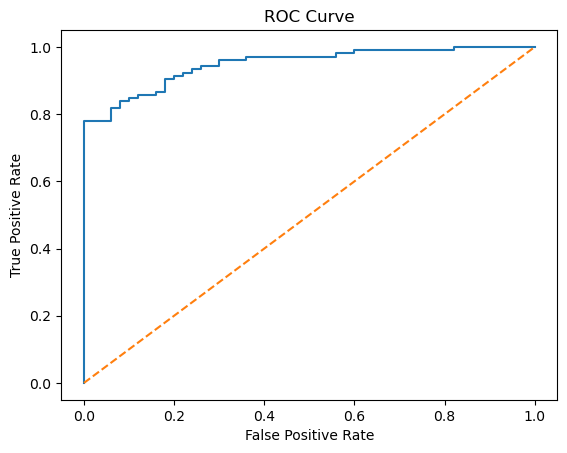

In [8]:
model = LogisticRegression(penalty='l1', solver='saga')
start = time.time()
model.fit(Xtrain_scaled, ytrain)
end = time.time()
train_time = end - start

start = time.time()
ytest_pred = model.predict(Xtest_scaled)
precision = precision_score(ytest, ytest_pred)
recall = recall_score(ytest, ytest_pred)
f1 = f1_score(ytest, ytest_pred)
end = time.time()
test_time = end - start

print('Precision score:', round(precision*100, 2),'%')
print('Recall score:', round(recall*100, 2),'%')
print('F1-score:', round(f1*100, 2),'%')

print('Train time:', round(train_time*1000, 2),'ms')
print('Test time:', round(test_time*1000, 2),'ms')

ytest_probs = model.predict_proba(Xtest_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(ytest, ytest_probs)
auc = roc_auc_score(ytest, ytest_probs)

print('Area under ROC curve:', round(auc*100, 2),'%')
plt.plot(fpr, tpr, 'tab:blue')
plt.plot([0, 1], [0, 1],'--', color='tab:orange')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### Question3: Neural Network 


### Q3a) Building model (15 pts)

Build a simple neural network model (NN_model1) using PyTorch packages with the features in the data set as the input units and two output units for the two output classes:

* Use a LogSigmoid as your output non-linearity.
* Use the Cross-entropy loss as a training criterion. 
* Use Stochastic gradient descent optimizer with a learning rate of 0.01. 
* Run the optimization for 8000 iterations and record the loss for each iteration. 
* Plot the loss versus iterations.

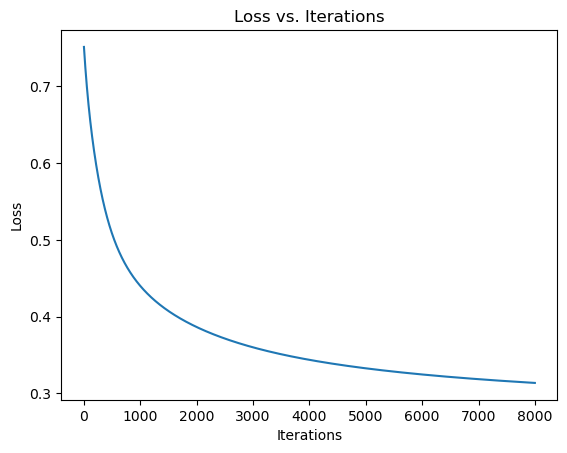

In [9]:
class NN_model1(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_size, output_size)
        self.activation = torch.nn.LogSigmoid()

    def forward(self, X):
        self.to(torch.float64)
        X = self.linear1(X)
        X = self.activation(X)
        return X

torch.manual_seed(42)

start = time.time()
NN_model_1 = NN_model1(Xtrain.shape[1], len(ytrain.unique()))
optimizer = torch.optim.SGD(NN_model_1.parameters(), lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()

num_iterations = 8000
losses = []
for i in range(num_iterations):
    Xtrain_tensor = torch.tensor(Xtrain_scaled)
    outputs = NN_model_1(Xtrain_tensor)
    ytrain_tensor = torch.tensor(ytrain.values)
    loss = criterion(outputs, ytrain_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

end = time.time()
train_time = end - start

plt.plot(range(num_iterations), losses)
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()  

### Q3b) Prediction (20 pts)

Now use your trained model (NN_model1) to make predictions on the test set.

A) Print out the precision, recall, and F1-score of the test set.

B) Print out the model execution time (both training and test time) in milliseconds. Please keep two decimal places.

C) Plot ROC curve and report the area under the ROC curve for the test data set. 

Precision score: 84.35 %
Recall score: 92.38 %
F1-score: 88.18 %
Train time: 6580.82 ms
Test time: 10.43 ms
Area under ROC curve: 91.26 %


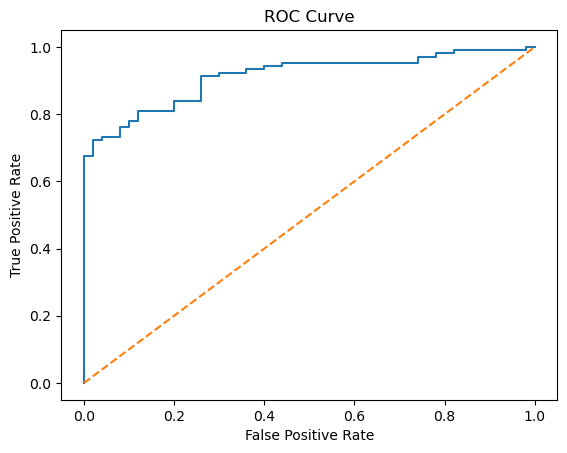

In [10]:
softmaxer = torch.nn.Softmax(dim=1)
start = time.time()
Xtest_tensor = torch.tensor(Xtest_scaled)
ypred = NN_model_1(Xtest_tensor)
ypred_proba = softmaxer(ypred)
ypred = torch.argmax(ypred, dim=1)
ypred=ypred.detach().numpy()

precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
end = time.time()
test_time = end - start

print('Precision score:', round(precision*100, 2),'%')
print('Recall score:', round(recall*100, 2),'%')
print('F1-score:', round(f1*100, 2),'%')

print('Train time:', round(train_time*1000, 2),'ms')
print('Test time:', round(test_time*1000, 2),'ms')

ypred_proba=ypred_proba.detach().numpy()[:,1]
fpr, tpr, thresholds = roc_curve(ytest, ypred_proba)
auc = roc_auc_score(ytest, ypred_proba)

print('Area under ROC curve:', round(auc*100, 2),'%')
plt.plot(fpr, tpr, 'tab:blue')
plt.plot([0, 1], [0, 1],'--', color='tab:orange')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


### Q3c) Adding hidden layers (15 pts)
Change the neural network (NN_model2) and add two hidden layers with 100 and 60 units, respectively. Use the LogSigmoid non-linearity for the hidden layers. Leave all the other parameters the same as for Question 3a. Again train for 8000 iterations and plot the loss as a function of the iteration. 

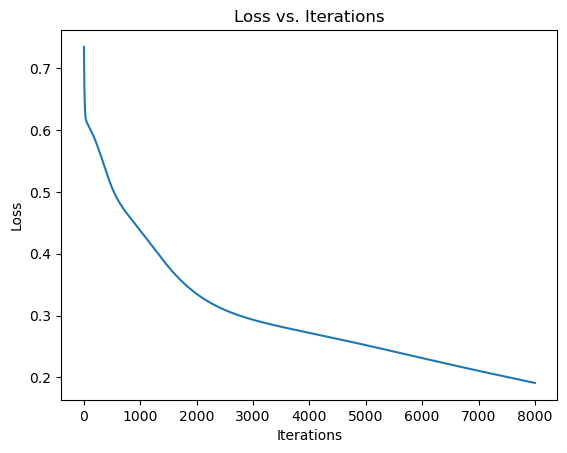

In [11]:
class NN_model2(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.hidden1 = torch.nn.Linear(input_size, 100)
        self.hidden2 = torch.nn.Linear(100, 60)
        self.hidden3 = torch.nn.Linear(60, output_size)
        self.activation = torch.nn.LogSigmoid()
    
    def forward(self, X):
        self.to(torch.float64)
        X = self.hidden1(X)
        X = self.activation(X)
        X = self.hidden2(X)
        X = self.activation(X)
        X = self.hidden3(X)
        X = self.activation(X)
        return X

start = time.time()
NN_model_2 = NN_model2(Xtrain.shape[1], len(ytrain.unique()))
optimizer = torch.optim.SGD(NN_model_2.parameters(), lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()

torch.manual_seed(42)

num_iterations = 8000
losses = []
for i in range(num_iterations):
    Xtrain_tensor = torch.tensor(Xtrain_scaled)
    outputs = NN_model_2(Xtrain_tensor)
    ytrain_tensor = torch.tensor(ytrain.values)
    loss = criterion(outputs, ytrain_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

end = time.time()
train_time = end - start

plt.plot(range(num_iterations), losses)
plt.title('Loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

### Q3d) Prediction and model selection (20 pts)
Now use your trained model in Question 3c (NN_model2) to make predictions on the test set.

A) Print out the precision, recall, and F1-score of the test set.

B) Print out the model execution time (both training and test time) in milliseconds. Please keep two decimal places.

C) Plot ROC curve and report the area under the ROC curve for the test data set. 

__Written answer:__ Compare this model (NN_model2) to the results from Question 2 (Logistic Regression) and 3b (NN_model1), what do you conclude? 

Precision score: 84.11 %
Recall score: 85.71 %
F1-score: 84.91 %
Train time: 18672.62 ms
Test time: 9.3 ms
Area under ROC curve: 88.97 %


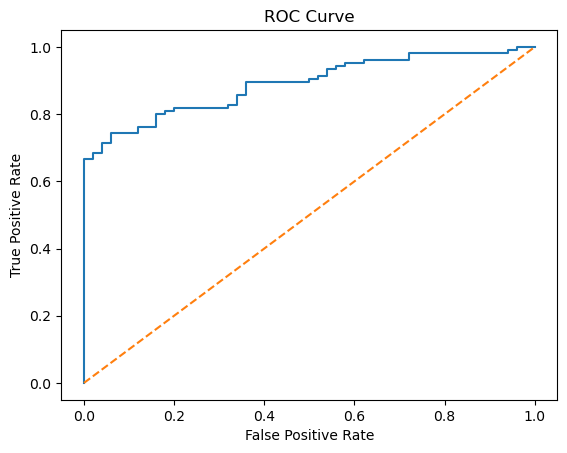

In [13]:
softmaxer = torch.nn.Softmax(dim=1)
start = time.time()
Xtest_tensor = torch.tensor(Xtest_scaled)
ypred = NN_model_2(Xtest_tensor)
ypred_proba = softmaxer(ypred)
ypred = torch.argmax(ypred, dim=1)
ypred=ypred.detach().numpy()

precision = precision_score(ytest, ypred)
recall = recall_score(ytest, ypred)
f1 = f1_score(ytest, ypred)
end = time.time()
test_time = end - start

print('Precision score:', round(precision*100, 2),'%')
print('Recall score:', round(recall*100, 2),'%')
print('F1-score:', round(f1*100, 2),'%')

print('Train time:', round(train_time*1000, 2),'ms')
print('Test time:', round(test_time*1000, 2),'ms')

ypred_proba=ypred_proba.detach().numpy()[:,1]
fpr, tpr, thresholds = roc_curve(ytest, ypred_proba)
auc = roc_auc_score(ytest, ypred_proba)

print('Area under ROC curve:', round(auc*100, 2),'%')
plt.plot(fpr, tpr, 'tab:blue')
plt.plot([0, 1], [0, 1],'--', color='tab:orange')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


__Written answer:__ 

__Logistic Regression had the best scores followed closely by NN_model1, NN_model2 fell behind.__ 

__Logistic Regression had the fastest training and tesing time, whereas NN_model2 had the slowest training time but a fast testing time, and NN_model1 had a very slow training time and the slowest testing time.__

__NN_model2's extra layers helped reduce loss but put an extra cost on training and preformed the worst.__ 

__NN_model1 kept up with Logistic Regression, since it had fewer layers, it predicted correctly more often.__ 

__Logistic Regression preformed well because the dataset's size was small.__ 